In [30]:
import pandas as pd

# Load the bankrupt and healthy datasets
bankrupt_path = "bankrupt_financial_ratio_dataset_final.xlsx"
healthy_path = "healthy_financial_ratio_dataset _final.xlsx"

In [31]:
# Load the datasets
bankrupt_data = pd.read_excel(bankrupt_path)
healthy_data = pd.read_excel(healthy_path)

# Display basic info of both datasets
bankrupt_data_info = bankrupt_data.info()
healthy_data_info = healthy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Folder_name   976 non-null    object 
 1   Feature_name  976 non-null    int64  
 2   x1            976 non-null    float64
 3   x2            976 non-null    float64
 4   x3            976 non-null    float64
 5   x4            976 non-null    float64
 6   x5            976 non-null    float64
 7   x6            976 non-null    float64
 8   x7            976 non-null    float64
 9   x8            866 non-null    float64
 10  x9            976 non-null    float64
 11  x10           976 non-null    float64
 12  x11           976 non-null    float64
 13  x12           976 non-null    float64
 14  x13           976 non-null    float64
 15  x14           976 non-null    float64
 16  x15           976 non-null    float64
 17  x16           863 non-null    float64
 18  x17           976 non-null    

In [32]:
# Step 1: Assign binary labels (1 for bankrupt, 0 for healthy)
bankrupt_data["Label"] = 1
healthy_data["Label"] = 0

# Step 2: Concatenate both datasets
financial_data = pd.concat([bankrupt_data, healthy_data], ignore_index=True)

# Step 3: Check for missing values across all columns
missing_values_summary = financial_data.isnull().sum()

missing_values_summary


Folder_name      0
Feature_name     0
x1               0
x2               0
x3               0
                ..
x63              0
x64             31
x65              0
x66              0
Label            0
Length: 69, dtype: int64

In [33]:
# Step 1: Impute missing values in x64 with the mean
financial_data["x64"].fillna(financial_data["x64"].mean(), inplace=True)

# Step 2: Sort data by Folder_name (company) and Feature_name (assumed year or chronological indicator)
financial_data.sort_values(by=["Folder_name", "Feature_name"], inplace=True)

# Confirm imputation and sorting by displaying basic info and first few rows
financial_data_info = financial_data.info()
financial_data_head = financial_data.head()

financial_data_info, financial_data_head


<class 'pandas.core.frame.DataFrame'>
Index: 3576 entries, 2989 to 533
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Folder_name   3576 non-null   object 
 1   Feature_name  3576 non-null   int64  
 2   x1            3576 non-null   float64
 3   x2            3576 non-null   float64
 4   x3            3576 non-null   float64
 5   x4            3576 non-null   float64
 6   x5            3576 non-null   float64
 7   x6            3576 non-null   float64
 8   x7            3576 non-null   float64
 9   x8            3164 non-null   float64
 10  x9            3576 non-null   float64
 11  x10           3576 non-null   float64
 12  x11           3576 non-null   float64
 13  x12           3576 non-null   float64
 14  x13           3576 non-null   float64
 15  x14           3576 non-null   float64
 16  x15           3576 non-null   float64
 17  x16           3161 non-null   float64
 18  x17           3576 non-null   f

C:\Users\Sai Chiranthan H M\AppData\Local\Temp\ipykernel_488\1807669252.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  financial_data["x64"].fillna(financial_data["x64"].mean(), inplace=True)


(None,
         Folder_name  Feature_name    x1    x2        x3    x4        x5  \
 2989  3M India Ltd.          2019  2.55  1.92  0.858994  0.01  0.306365   
 2988  3M India Ltd.          2020  3.27  2.50  1.366329  0.00  0.240912   
 2987  3M India Ltd.          2021  3.10  2.44  1.542825  0.00  0.259707   
 2986  3M India Ltd.          2022  3.20  2.56  1.746127  0.00  0.252986   
 2985  3M India Ltd.          2023  2.17  1.55  0.816717  0.00  0.361160   
 
             x6      x7        x8  ...       x58       x59       x60       x61  \
 2989  0.037763  142.41       NaN  ...  0.017235  0.193289  1.192506  1.572393   
 2988  0.036019  125.94  0.845253  ...  0.020743  0.147903  1.096367  1.374150   
 2987  0.038894   98.23  1.124600  ...  0.019830  0.080277  0.908777  1.017408   
 2986  0.034112    1.04  0.960277  ...  0.020596  0.109302  0.999834  1.170639   
 2985  0.031086    1.26  0.804113  ...  0.020855  0.157089  1.259949  1.690818   
 
            x62       x63    x64       x6

C:\Users\Sai Chiranthan H M\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Sai Chiranthan H M\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\Sai Chiranthan H M\AppData\Roaming\Python\Python311\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_

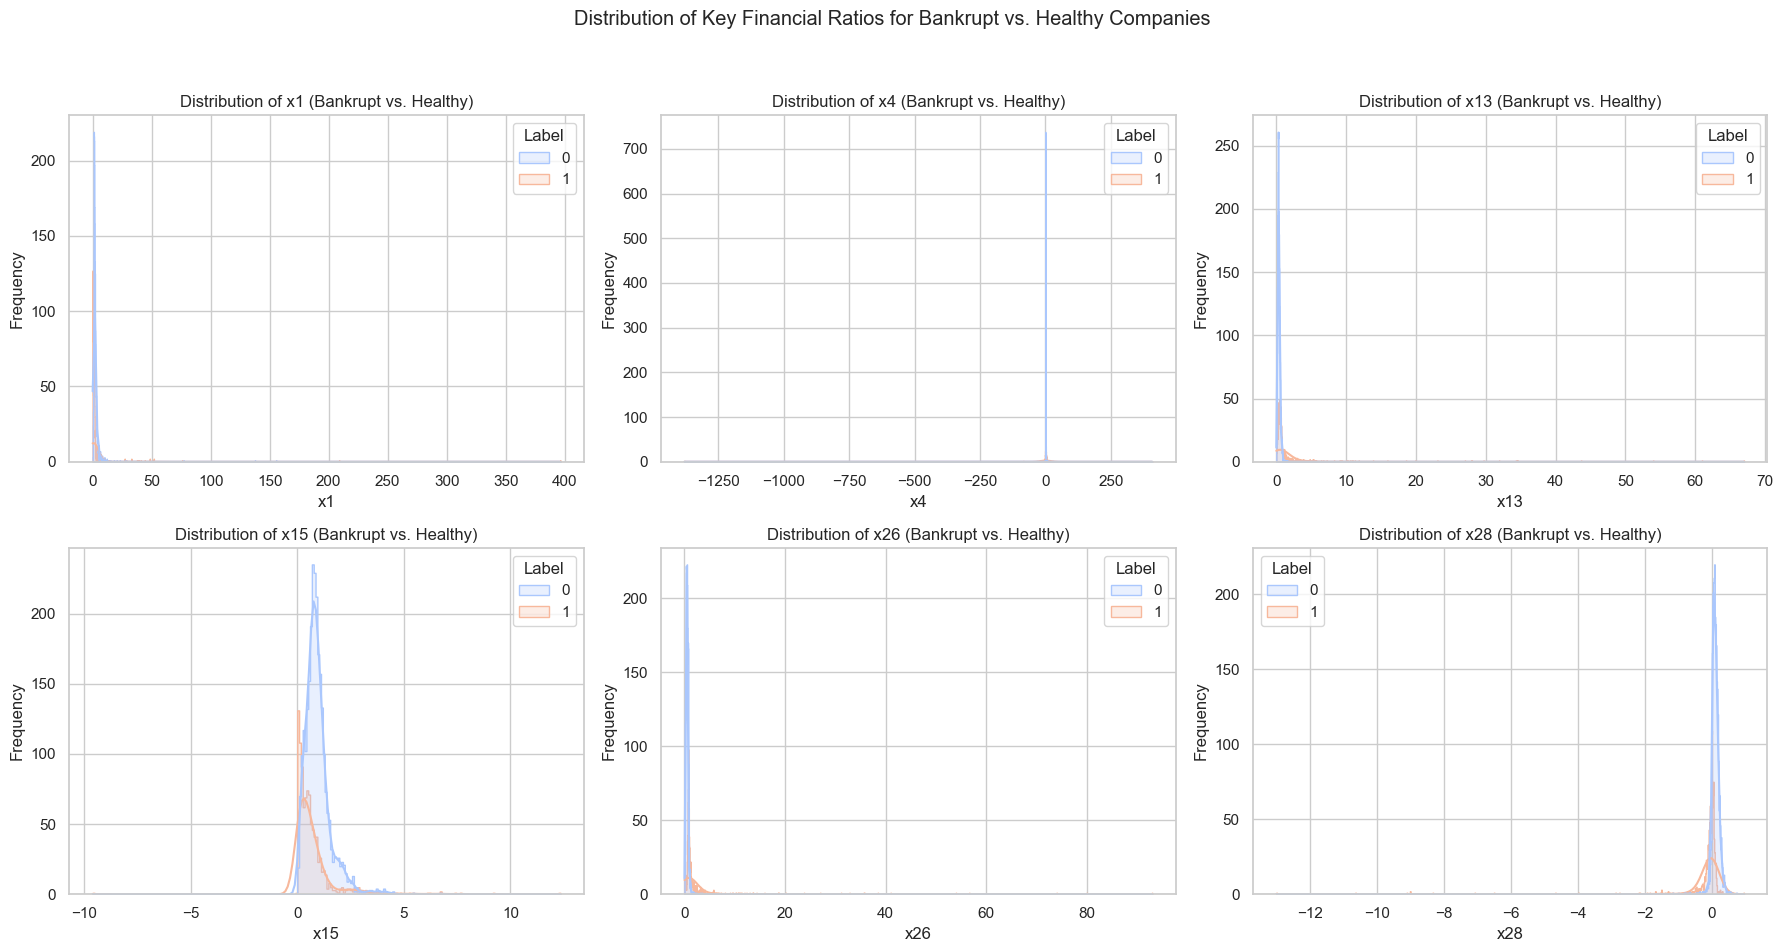

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up seaborn style for better visualizations
sns.set(style="whitegrid")

# Plot the distribution of key financial ratios for bankrupt vs. healthy companies
# Select a few key financial ratios to visualize their distributions
key_ratios = ["x1", "x4", "x13", "x15", "x26", "x28"]
num_ratios = len(key_ratios)

# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle("Distribution of Key Financial Ratios for Bankrupt vs. Healthy Companies")

# Plot each ratio distribution on a separate subplot
for idx, ratio in enumerate(key_ratios):
    row, col = divmod(idx, 3)
    sns.histplot(data=financial_data, x=ratio, hue="Label", kde=True, ax=axes[row][col], palette="coolwarm", element="step")
    axes[row][col].set_title(f"Distribution of {ratio} (Bankrupt vs. Healthy)")
    axes[row][col].set_xlabel(ratio)
    axes[row][col].set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Observations:

Certain ratios, such as x4 (Total Liabilities / Total Equity) and x26 (Total Liabilities / Total Assets), show noticeable differences in distributions between bankrupt and healthy companies.

Ratios like x13 (Total Debt / Total Assets) and x15 (Sales / Total Assets) also display distinct patterns, which may provide predictive power for bankruptcy classification.

In [35]:
# Creating lagged features and rolling statistics for selected ratios

# Define the key ratios for which we will create lagged features and rolling statistics
selected_ratios = ["x1", "x4", "x13", "x15", "x26", "x28"]

# Sort the data again by company and year to ensure correct ordering before feature engineering
financial_data = financial_data.sort_values(by=["Folder_name", "Feature_name"])

# Create lagged features (1-year lag) and 2-year rolling mean and std for selected ratios
for ratio in selected_ratios:
    # 1-year lag
    financial_data[f"{ratio}_lag1"] = financial_data.groupby("Folder_name")[ratio].shift(1)
    
    # 2-year rolling mean and std
    financial_data[f"{ratio}_rolling_mean_2y"] = financial_data.groupby("Folder_name")[ratio].transform(lambda x: x.rolling(2).mean())
    financial_data[f"{ratio}_rolling_std_2y"] = financial_data.groupby("Folder_name")[ratio].transform(lambda x: x.rolling(2).std())

# Check the newly created features
financial_data[selected_ratios + [f"{ratio}_lag1" for ratio in selected_ratios] + 
               [f"{ratio}_rolling_mean_2y" for ratio in selected_ratios] + 
               [f"{ratio}_rolling_std_2y" for ratio in selected_ratios]].head(10)


,x1,x4,x13,x15,x26,x28,x1_lag1,x4_lag1,x13_lag1,x15_lag1,...,x13_rolling_mean_2y,x15_rolling_mean_2y,x26_rolling_mean_2y,x28_rolling_mean_2y,x1_rolling_std_2y,x4_rolling_std_2y,x13_rolling_std_2y,x15_rolling_std_2y,x26_rolling_std_2y,x28_rolling_std_2y
2989,2.55,0.01,0.306365,1.441543,0.323601,0.249037,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2988,3.27,0.00,0.240912,1.278781,0.261656,0.182414,2.55,0.01,0.306365,1.441543,...,0.273639,1.360162,0.292628,0.215726,0.509117,0.007071,0.046282,0.115090,0.043802,0.047109
2987,3.10,0.00,0.259707,0.991718,0.279537,0.082941,3.27,0.00,0.240912,1.278781,...,0.250310,1.135249,0.270596,0.132678,0.120208,0.000000,0.013290,0.202984,0.012644,0.070338
2986,3.20,0.00,0.252986,1.122098,0.273582,0.122265,3.10,0.00,0.259707,0.991718,...,0.256346,1.056908,0.276559,0.102603,0.070711,0.000000,0.004752,0.092193,0.004211,0.027806
2985,2.17,0.00,0.361160,1.483728,0.382015,0.223779,3.20,0.00,0.252986,1.122098,...,0.307073,1.302913,0.327798,0.173022,0.728320,0.000000,0.076491,0.255711,0.076674,0.071781
3159,1.25,0.13,0.581636,1.136169,0.587786,0.052071,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3158,1.49,0.20,0.505891,1.100486,0.593924,0.064057,1.25,0.13,0.581636,1.136169,...,0.543764,1.118327,0.590855,0.058064,0.169706,0.049497,0.053560,0.025232,0.004340,0.008476
3157,1.56,0.18,0.490385,1.127409,0.575260,0.074532,1.49,0.20,0.505891,1.100486,...,0.498138,1.113947,0.584592,0.069295,0.049497,0.014142,0.010964,0.019038,0.013198,0.007407
3156,1.33,0.00,0.588485,0.694355,0.594187,0.037559,1.56,0.18,0.490385,1.127409,...,0.539435,0.910882,0.584723,0.056046,0.162635,0.127279,0.069367,0.306215,0.013383,0.026143
3155,1.50,0.00,0.554349,0.746304,0.558514,0.043532,1.33,0.00,0.588485,0.694355,...,0.571417,0.720330,0.576351,0.040546,0.120208,0.000000,0.024138,0.036734,0.025224,0.004224


In [36]:
from sklearn.model_selection import train_test_split

# Drop non-numeric columns that won't be used as features
X = financial_data.drop(columns=["Folder_name", "Feature_name", "Label"])
y = financial_data["Label"]

# Create a time-based split, using the last 20% of the data for testing
train_size = 0.8  # Use 80% of data for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1 - train_size), shuffle=False)

# Check the split sizes and the first few entries of each set
X_train_size, X_test_size, y_train_size, y_test_size = X_train.shape[0], X_test.shape[0], y_train.shape[0], y_test.shape[0]
X_train_head, X_test_head = X_train.head(), X_test.head()

X_train_size, X_test_size, y_train_size, y_test_size, X_train_head, X_test_head


(2860,
 716,
 2860,
 716,
         x1    x2        x3    x4        x5        x6      x7        x8  \
 2989  2.55  1.92  0.858994  0.01  0.306365  0.037763  142.41       NaN   
 2988  3.27  2.50  1.366329  0.00  0.240912  0.036019  125.94  0.845253   
 2987  3.10  2.44  1.542825  0.00  0.259707  0.038894   98.23  1.124600   
 2986  3.20  2.56  1.746127  0.00  0.252986  0.034112    1.04  0.960277   
 2985  2.17  1.55  0.816717  0.00  0.361160  0.031086    1.26  0.804113   
 
             x9       x10  ...  x13_rolling_std_2y  x15_lag1  \
 2989  1.123021  1.123021  ...                 NaN       NaN   
 2988  1.123724  1.123724  ...            0.046282  1.441543   
 2987  1.165637  1.165637  ...            0.013290  1.278781   
 2986  1.131780  1.131780  ...            0.004752  0.991718   
 2985  1.112552  1.112552  ...            0.076491  1.122098   
 
       x15_rolling_mean_2y  x15_rolling_std_2y  x26_lag1  x26_rolling_mean_2y  \
 2989                  NaN                 NaN       Na

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True)
}

# Dictionary to store results
model_performance = {}

# Impute missing values
imputer = SimpleImputer(strategy='mean')

# Evaluate each model with a pipeline
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    
    # Create a pipeline to impute missing values and apply the model
    pipeline = Pipeline([
        ("imputer", imputer),
        ("classifier", model)
    ])
    
    # Cross-validation on training data for accuracy
    cv_accuracy = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy').mean()
    
    # Fit the model on the full training data and evaluate on test data
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    # Store results
    model_performance[model_name] = {
        "CV Accuracy": cv_accuracy,
        "Test Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    }

# Display the results
for model_name, metrics in model_performance.items():
    print(f"\n{model_name} Performance:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


Evaluating Logistic Regression...


C:\Users\Sai Chiranthan H M\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sai Chiranthan H M\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

Evaluating Random Forest...
Evaluating Gradient Boosting...
Evaluating SVM...

Logistic Regression Performance:
CV Accuracy: 0.9024
Test Accuracy: 0.8980
Precision: 0.7527
Recall: 0.8303
F1 Score: 0.7896
ROC AUC: 0.9413

Random Forest Performance:
CV Accuracy: 0.9129
Test Accuracy: 0.9232
Precision: 0.7865
Recall: 0.9152
F1 Score: 0.8459
ROC AUC: 0.9672

Gradient Boosting Performance:
CV Accuracy: 0.9105
Test Accuracy: 0.9190
Precision: 0.7801
Recall: 0.9030
F1 Score: 0.8371
ROC AUC: 0.9677

SVM Performance:
CV Accuracy: 0.7196
Test Accuracy: 0.7696
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC AUC: 0.8346


C:\Users\Sai Chiranthan H M\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [38]:
'''import os

# Define the folder path containing the VIX files
folder_path = 'VIX'
output_data = []

# Loop over each file in the folder
for filename in sorted(os.listdir(folder_path)):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)
        
        # Extract the year from the filename
        year = filename.split('.')[0]  # Assuming filenames are like '2014.csv', '2015.csv', etc.
        
        # Load the CSV file
        df = pd.read_csv(file_path)
        
        # Calculate the mean of each numeric column
        mean_values = df.mean(numeric_only=True)
        
        # Add the year to the data
        mean_values['Year'] = year
        
        # Append to the output data list
        output_data.append(mean_values)

# Combine all the yearly mean data into a single DataFrame
output_df = pd.DataFrame(output_data)

# Define output path for the new CSV
output_csv_path = 'VIX_yearly_means.csv'
output_df.to_csv(output_csv_path, index=False)

output_df.head(), output_csv_path'''


'import os\n\n# Define the folder path containing the VIX files\nfolder_path = \'VIX\'\noutput_data = []\n\n# Loop over each file in the folder\nfor filename in sorted(os.listdir(folder_path)):\n    if filename.endswith(".csv"):\n        file_path = os.path.join(folder_path, filename)\n        \n        # Extract the year from the filename\n        year = filename.split(\'.\')[0]  # Assuming filenames are like \'2014.csv\', \'2015.csv\', etc.\n        \n        # Load the CSV file\n        df = pd.read_csv(file_path)\n        \n        # Calculate the mean of each numeric column\n        mean_values = df.mean(numeric_only=True)\n        \n        # Add the year to the data\n        mean_values[\'Year\'] = year\n        \n        # Append to the output data list\n        output_data.append(mean_values)\n\n# Combine all the yearly mean data into a single DataFrame\noutput_df = pd.DataFrame(output_data)\n\n# Define output path for the new CSV\noutput_csv_path = \'VIX_yearly_means.csv\'\no

Using VIX

In [39]:
# Load VIX yearly means data
vix_yearly_means = pd.read_csv("VIX_yearly_means.csv")  # Replace with actual file path

# Calculate the overall mean of VIX values to fill missing years
overall_mean_vix = vix_yearly_means['Close '].mean()


# Merge annual VIX means with financial data by year
financial_data = financial_data.merge(vix_yearly_means, left_on='Feature_name', right_on='Year', how='left')

# Fill missing VIX values with the overall mean
financial_data['Close '].fillna(overall_mean_vix, inplace=True)

# Drop extra 'Year' column after merging, if desired
financial_data.drop(columns=['Year'], inplace=True)

C:\Users\Sai Chiranthan H M\AppData\Local\Temp\ipykernel_488\2227844152.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  financial_data['Close '].fillna(overall_mean_vix, inplace=True)


In [40]:
financial_data.head(20)

,Folder_name,Feature_name,x1,x2,x3,x4,x5,x6,x7,x8,...,x28_lag1,x28_rolling_mean_2y,x28_rolling_std_2y,Open,High,Low,Close,Prev. Close,Change,% Change
0,3M India Ltd.,2019,2.55,1.92,0.858994,0.01,0.306365,0.037763,142.41,NaN,...,NaN,NaN,NaN,19.241812,20.335860,17.555142,19.429251,19.241812,0.187652,0.708502
1,3M India Ltd.,2020,3.27,2.50,1.366329,0.00,0.240912,0.036019,125.94,0.845253,...,0.249037,0.215726,0.047109,25.511968,26.398444,23.216697,25.516386,25.699317,-0.183574,-0.352289
2,3M India Ltd.,2021,3.10,2.44,1.542825,0.00,0.259707,0.038894,98.23,1.124600,...,0.182414,0.132678,0.070338,17.841734,18.662440,16.379446,17.841391,17.841734,-0.000363,0.163992
3,3M India Ltd.,2022,3.20,2.56,1.746127,0.00,0.252986,0.034112,1.04,0.960277,...,0.082941,0.102603,0.027806,17.515020,18.252801,16.315763,17.484398,17.515020,-0.030321,-0.074819
4,3M India Ltd.,2023,2.17,1.55,0.816717,0.00,0.361160,0.031086,1.26,0.804113,...,0.122265,0.173022,0.071781,12.444787,12.918303,11.716026,12.444370,12.444787,-0.000488,0.066829
5,ABB India Ltd.,2014,1.25,1.02,0.056950,0.13,0.581636,0.029606,113.36,NaN,...,NaN,NaN,NaN,17.376111,18.140093,15.558498,17.346770,17.376111,-0.029424,-0.009588
6,ABB India Ltd.,2015,1.49,1.24,0.153037,0.20,0.505891,0.031563,109.87,0.912712,...,0.052071,0.058064,0.008476,17.999170,18.787287,16.485577,18.010405,18.001943,0.008623,0.242227
7,ABB India Ltd.,2016,1.56,1.31,0.313751,0.18,0.490385,0.032041,111.89,0.913117,...,0.064057,0.069295,0.007407,15.342440,15.849919,14.075262,15.325655,15.342440,-0.016573,-0.024677
8,ABB India Ltd.,2017,1.33,1.10,0.285186,0.00,0.588485,0.031742,68.56,1.459469,...,0.074532,0.056046,0.026143,12.948232,13.488902,11.567490,12.961799,12.948232,0.013740,0.197033
9,ABB India Ltd.,2018,1.50,1.31,0.293151,0.00,0.554349,0.043413,73.70,1.476443,...,0.037559,0.040546,0.004224,15.333266,15.956663,13.477288,15.339022,15.333266,0.005726,0.132621


In [42]:
financial_dataVIX = financial_data.copy()
financial_dataVIX.head()

,Folder_name,Feature_name,x1,x2,x3,x4,x5,x6,x7,x8,...,x28_lag1,x28_rolling_mean_2y,x28_rolling_std_2y,Open,High,Low,Close,Prev. Close,Change,% Change
0,3M India Ltd.,2019,2.55,1.92,0.858994,0.01,0.306365,0.037763,142.41,NaN,...,NaN,NaN,NaN,19.241812,20.335860,17.555142,19.429251,19.241812,0.187652,0.708502
1,3M India Ltd.,2020,3.27,2.50,1.366329,0.00,0.240912,0.036019,125.94,0.845253,...,0.249037,0.215726,0.047109,25.511968,26.398444,23.216697,25.516386,25.699317,-0.183574,-0.352289
2,3M India Ltd.,2021,3.10,2.44,1.542825,0.00,0.259707,0.038894,98.23,1.124600,...,0.182414,0.132678,0.070338,17.841734,18.662440,16.379446,17.841391,17.841734,-0.000363,0.163992
3,3M India Ltd.,2022,3.20,2.56,1.746127,0.00,0.252986,0.034112,1.04,0.960277,...,0.082941,0.102603,0.027806,17.515020,18.252801,16.315763,17.484398,17.515020,-0.030321,-0.074819
4,3M India Ltd.,2023,2.17,1.55,0.816717,0.00,0.361160,0.031086,1.26,0.804113,...,0.122265,0.173022,0.071781,12.444787,12.918303,11.716026,12.444370,12.444787,-0.000488,0.066829


In [48]:
# Drop non-numeric columns that won't be used as features
X = financial_data.drop(columns=["Folder_name", "Feature_name", "Label"])
y = financial_data["Label"]

# Create a time-based split, using the last 20% of the data for testing
train_size = 0.8  # Use 80% of data for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1 - train_size), shuffle=False)


In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(probability=True)
}

# Dictionary to store results
model_performance = {}

# Impute missing values
imputer = SimpleImputer(strategy='mean')

# Evaluate each model with a pipeline
for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    
    # Create a pipeline to impute missing values and apply the model
    pipeline = Pipeline([
        ("imputer", imputer),
        ("classifier", model)
    ])
    
    # Cross-validation on training data for accuracy
    cv_accuracy = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='accuracy').mean()
    
    # Fit the model on the full training data and evaluate on test data
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    
    # Store results
    model_performance[model_name] = {
        "CV Accuracy": cv_accuracy,
        "Test Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc
    }

# Display the results
for model_name, metrics in model_performance.items():
    print(f"\n{model_name} Performance:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


Evaluating Logistic Regression...


C:\Users\Sai Chiranthan H M\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sai Chiranthan H M\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

Evaluating Random Forest...
Evaluating Gradient Boosting...
Evaluating SVM...

Logistic Regression Performance:
CV Accuracy: 0.9042
Test Accuracy: 0.8994
Precision: 0.7541
Recall: 0.8364
F1 Score: 0.7931
ROC AUC: 0.9444

Random Forest Performance:
CV Accuracy: 0.9101
Test Accuracy: 0.9204
Precision: 0.7812
Recall: 0.9091
F1 Score: 0.8403
ROC AUC: 0.9694

Gradient Boosting Performance:
CV Accuracy: 0.9070
Test Accuracy: 0.9176
Precision: 0.7760
Recall: 0.9030
F1 Score: 0.8347
ROC AUC: 0.9676

SVM Performance:
CV Accuracy: 0.7196
Test Accuracy: 0.7696
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC AUC: 0.8327


C:\Users\Sai Chiranthan H M\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
